In [ ]:
import kagglehub

In [ ]:
path = kagglehub.dataset_download("bharathsj/twitterdisastertext-analysis")

100%|██████████| 587k/587k [00:00<00:00, 54.4MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/bharathsj/twitterdisastertext-analysis/versions/4


In [ ]:
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = ["The flood was devastating.", "It is a sunny day."]
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=10)

print(padded)



[[ 0  0  0  0  0  0  2  3  4  5]
 [ 0  0  0  0  0  6  7  8  9 10]]


In [ ]:
import pandas as pd
file_path = '/root/.cache/kagglehub/datasets/bharathsj/twitterdisastertext-analysis/versions/4/train.csv'

df = pd.read_csv(file_path)
print(df.head())



   id keyword                       location  \
0   1  ablaze                     Birmingham   
1   4  ablaze  Est. September 2012 - Bristol   
2   5  ablaze                         AFRICA   
3   6  ablaze               Philadelphia, PA   
4   7  ablaze                     London, UK   

                                                text  target  
0  Our Deeds are the Reason of this #earthquake M...       1  
1             Forest fire near La Ronge Sask. Canada       1  
2  All residents asked to 'shelter in place' are ...       1  
3  13,000 people receive #wildfires evacuation or...       1  
4  Just got sent this photo from Ruby #Alaska as ...       1  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1, 2),
    stop_words='english',
    min_df=3,
    max_df=0.9
)

X_tfidf = vectorizer.fit_transform(df['text'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['target'], test_size=0.2, random_state=42)
model = LinearSVC(class_weight='balanced')
model.fit(X_train, y_train)


LinearSVC(class_weight='balanced')

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(class_weight='balanced'), param_grid=params, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best C:", grid.best_params_)
model = grid.best_estimator_

Best C: {'C': 0.1}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7866053841103086
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       875
           1       0.76      0.73      0.74       648

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



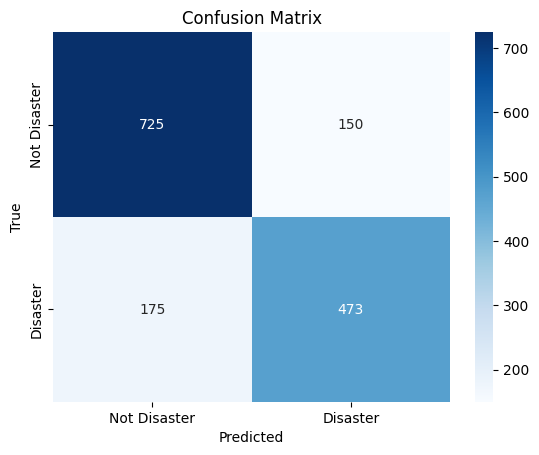

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Naive Bayes for Disaster Tweet Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_nb = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.7951411687458962
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       875
           1       0.83      0.65      0.73       648

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.80      0.79      1523



In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=50, random_state=42)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       875
           1       0.97      0.18      0.30       648

    accuracy                           0.65      1523
   macro avg       0.80      0.59      0.53      1523
weighted avg       0.77      0.65      0.57      1523



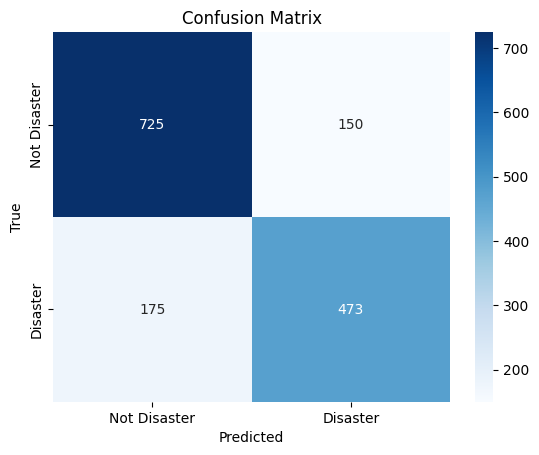

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_rf = make_pipeline(rf)
pipeline_rf.fit(X_train,y_train)
pred = pipeline_rf.predict(X_test)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
score_rf = accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       875
           1       0.79      0.57      0.66       648

    accuracy                           0.75      1523
   macro avg       0.76      0.73      0.73      1523
weighted avg       0.76      0.75      0.74      1523



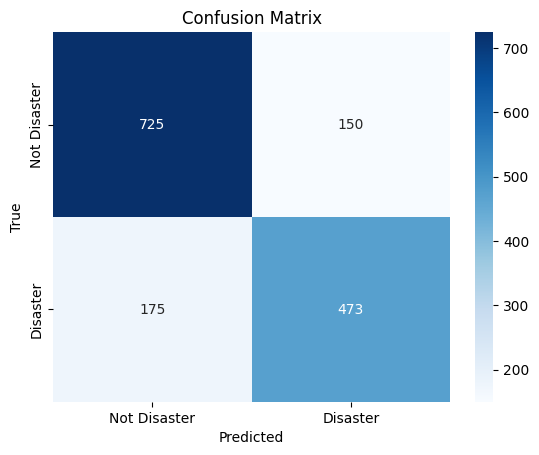

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
grd = GradientBoostingClassifier()
pipeline_grd = make_pipeline(grd)
pipeline_grd.fit(X_train,y_train)
pred = pipeline_grd.predict(X_test)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
score_grd = accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       875
           1       0.79      0.64      0.71       648

    accuracy                           0.77      1523
   macro avg       0.78      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



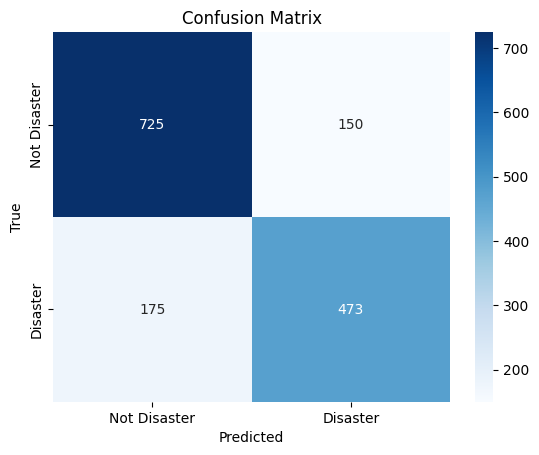

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
pipe_xgb = make_pipeline(xgb)
pipe_xgb.fit(X_train,y_train)
pred = pipe_xgb.predict(X_test)
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
score_xgb = accuracy_score(y_test,pred)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop = set(stopwords.words('english'))

def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r'http\S+|@\w+|#\w+', ' ', txt)
    txt = re.sub(r'[^a-z ]', ' ', txt)
    words = txt.split()
    words = [ps.stem(w) for w in words if w not in stop]
    return ' '.join(words)

file_path = '/root/.cache/kagglehub/datasets/bharathsj/twitterdisastertext-analysis/versions/4/train.csv'
file_path2 = '/root/.cache/kagglehub/datasets/bharathsj/twitterdisastertext-analysis/versions/4/test.csv'

train_df = pd.read_csv(file_path)
test_df  = pd.read_csv(file_path2)
train_df['clean'] = train_df['text'].apply(clean_text)
test_df['clean']  = test_df['text'].apply(clean_text)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
maxlen    = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['clean'])

X_train_seq = tokenizer.texts_to_sequences(train_df['clean'])
X_train      = pad_sequences(X_train_seq, maxlen=maxlen)

X_test_seq  = tokenizer.texts_to_sequences(test_df['clean'])
X_test       = pad_sequences(X_test_seq, maxlen=maxlen)

y_train = train_df['target'].values


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

embedding_layer = Embedding(10000, 100, input_length=100)

model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128,
                 kernel_size=5,
                 activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6459 - loss: 0.6252 - val_accuracy: 0.7735 - val_loss: 0.4781
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8712 - loss: 0.3215 - val_accuracy: 0.7708 - val_loss: 0.5173
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9412 - loss: 0.1750 - val_accuracy: 0.7446 - val_loss: 0.6052
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9564 - loss: 0.1191 - val_accuracy: 0.7413 - val_loss: 0.6967
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9675 - loss: 0.0911 - val_accuracy: 0.7229 - val_loss: 0.7687
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9705 - loss: 0.0816 - val_accuracy: 0.7308 - val_loss: 0.7868
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9738 - loss: 0.0684 - val_accuracy: 0.7183 - val_loss: 0.8339
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9754 - loss: 0.0584 - val_ac

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred      = (y_pred_prob > 0.5).astype(int)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
import numpy as np
y_test_keras = np.zeros(len(test_df))

accuracy = accuracy_score(y_test_keras, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6659515783021759


In [ ]:
from collections import Counter

y_pred_flat = y_pred.flatten()
counts = Counter(y_pred_flat)
print("Not a Disaster:", counts[0])
print("Disaster:", counts[1])

Not a Disaster: 2173
Disaster: 1090


In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten, multiply, Dense, Reshape, LSTM, TimeDistributed
from tensorflow.keras.models import Model

max_vocab      = 10000
maxlen         = 100
embed_dim      = 100
noise_dim      = 100
batch_size     = 64
epochs_pre     = 3
epochs_gan     = 10
num_classes    = 2

file_path = '/root/.cache/kagglehub/datasets/bharathsj/twitterdisastertext-analysis/versions/4/train.csv'
train_df = pd.read_csv(file_path)
y_train  = train_df['target'].values
texts    = train_df['text'].astype(str).values

noise_input = Input(shape=(noise_dim,), name='noise_input')
label_input = Input(shape=(1,), dtype='int32', name='label_input')

label_emb   = Embedding(num_classes, noise_dim)(label_input)
label_flat  = Flatten()(label_emb)
merged      = multiply([noise_input, label_flat])

x           = Dense(maxlen * embed_dim, activation='relu')(merged)
x           = Reshape((maxlen, embed_dim))(x)
x = LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(x)
gen_output  = TimeDistributed(
    Dense(max_vocab, activation='softmax'),
    name='gen_output')(x)

generator = Model(
    inputs=[noise_input, label_input],
    outputs=gen_output,
    name='generator')
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ label_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 100)    │        200 │ label_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noise_input         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 100)       │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 100)       │          0 │ noise_input[0][0… │
│ (Multiply)          │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10000)     │  1,010,000 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 100, 100)  │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 100, 128)  │    117,248 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gen_output          │ (None, 100,       │  1,290,000 │ lstm_1[0][0]      │
│ (TimeDistributed)   │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,417,448 (9.22 MB)

 Trainable params: 2,417,448 (9.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Embedding, Flatten, multiply, Dense, Reshape, LSTM, TimeDistributed, Lambda, Concatenate # Import Concatenate
from tensorflow.keras.models import Model

tweet_input  = Input(shape=(maxlen,), name='tweet_input')
label_input2 = Input(shape=(1,), dtype='int32', name='label_input2')

emb_layer    = Embedding(max_vocab, embed_dim, input_length=maxlen)
tweet_emb    = emb_layer(tweet_input)

label_emb2   = Embedding(num_classes, maxlen, input_length=1)(label_input2)
label_vec    = Reshape((maxlen,))(label_emb2)
label_emb2   = emb_layer(label_vec)

merged2      = Concatenate()([tweet_emb, label_emb2]) # Now Concatenate should work
y            = Conv1D(64, 5, activation='relu')(merged2)
y            = GlobalMaxPooling1D()(y)

real_fake    = Dense(1, activation='sigmoid', name='real_or_fake')(y)
aux_class    = Dense(num_classes, activation='softmax', name='class_label')(y)

discriminator = Model(
    inputs=[tweet_input, label_input2],
    outputs=[real_fake, aux_class],
    name='discriminator')
discriminator.compile(
    optimizer=Adam(learning_rate=2e-4),
    loss={
      'real_or_fake':'binary_crossentropy',
      'class_label':'sparse_categorical_crossentropy'
    })
discriminator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ label_input2        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 1, 100)    │        200 │ label_input2[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tweet_input         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 100)       │          0 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 100, 100)  │  1,000,000 │ tweet_input[0][0… │
│ (Embedding)         │                   │            │ reshape_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100, 200)  │          0 │ embedding_5[0][0… │
│ (Concatenate)       │                   │            │ embedding_5[1][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 96, 64)    │     64,064 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ real_or_fake        │ (None, 1)         │         65 │ global_max_pooli… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_label (Dense) │ (None, 2)         │        130 │ global_max_pooli… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,064,459 (4.06 MB)

 Trainable params: 1,064,459 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten, multiply, Dense, Reshape, LSTM, TimeDistributed, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
discriminator.trainable = False

gan_noise   = Input(shape=(noise_dim,), name='gan_noise')
gan_label   = Input(shape=(1,), dtype='int32', name='gan_label')
fake_tweet  = generator([gan_noise, gan_label])
gan_realfake, gan_class = discriminator([
    Lambda(lambda x: K.argmax(x, axis=-1))(fake_tweet),
    gan_label
])

gan = Model(
    inputs=[gan_noise, gan_label],
    outputs=[gan_realfake, gan_class],
    name='ac_gan')
gan.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss={
      'discriminator_real_or_fake':'binary_crossentropy',
      'discriminator_class_label':'sparse_categorical_crossentropy'
    })
gan.summary()


Model: "ac_gan"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ gan_noise           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gan_label           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ generator           │ (None, 100,       │  2,417,448 │ gan_noise[0][0],  │
│ (Functional)        │ 10000)            │            │ gan_label[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 100)       │          0 │ generator[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ discriminator       │ [(None, 1),       │  1,064,459 │ lambda[0][0],     │
│ (Functional)        │ (None, 2)]        │            │ gan_label[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,481,907 (13.28 MB)

 Trainable params: 2,417,448 (9.22 MB)

 Non-trainable params: 1,064,459 (4.06 MB)

In [ ]:
import numpy as np
generator.compile(
  optimizer=Adam(),
  loss='sparse_categorical_crossentropy'
)

for epoch in range(epochs_pre):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_seqs = X_train[idx]
    real_labels = y_train[idx]
    X_in  = real_seqs[:, :-1]
    y_true= real_seqs[:, 1:]
    y_true = np.expand_dims(y_true, -1)
    y_true = pad_sequences(y_true, maxlen=maxlen, padding='post', truncating='post')
    gen_loss = generator.train_on_batch(
       [np.random.randn(batch_size, noise_dim), real_labels],
       y_true)
    print(f'Pretrain G epoch{epoch+1}/{epochs_pre} loss {gen_loss:.4f}')

Pretrain G epoch1/3 loss 9.2105
Pretrain G epoch2/3 loss 9.2086
Pretrain G epoch3/3 loss 9.2065


In [ ]:
for epoch in range(epochs_gan):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_seqs   = X_train[idx]
    real_labels = y_train[idx].reshape(-1,1)
    noise       = np.random.randn(batch_size, noise_dim)
    sampled_lbl = np.random.randint(0, num_classes, size=(batch_size,1))
    fake_seqs   = generator.predict([noise, sampled_lbl])
    X = np.vstack([real_seqs, np.argmax(fake_seqs, axis=-1)])
    L = np.vstack([real_labels, sampled_lbl])
    y_rf = np.vstack([np.ones((batch_size,1)), np.zeros((batch_size,1))])
    d_loss = discriminator.train_on_batch([X,L], [y_rf, L])
    _, d_loss_rf, d_loss_class = d_loss
    d_acc_rf = discriminator.metrics[0].result().numpy()
    d_acc_class = discriminator.metrics[1].result().numpy()
    noise2     = np.random.randn(batch_size, noise_dim)
    sampled2   = np.random.randint(0, num_classes, size=(batch_size,1))
    valid_rf   = np.ones((batch_size,1))
    print(f'Epoch {epoch + 1}/{epochs_gan}, '
          f'Accuracy: {d_acc_class}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 1/10, Accuracy: 0.6932268142700195
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step
Epoch 2/10, Accuracy: 0.6937085390090942
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
Epoch 3/10, Accuracy: 0.6934106945991516
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Epoch 4/10, Accuracy: 0.6932846903800964
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Epoch 5/10, Accuracy: 0.6933488845825195
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step
Epoch 6/10, Accuracy: 0.6935884356498718
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step
Epoch 7/10, Accuracy: 0.6936354041099548
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step
Epoch 8/10, Accuracy: 0.6936041712760925
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step
Epoch 9/10, Accuracy: 0.6935937404632568
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step
Epoch 10/10, Accuracy: 0.6937052011489868


In [ ]:

from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter


fit_accuracy = model.score(X_train, y_train)
print("Fit Accuracy:", fit_accuracy)


y_pred = model.predict(X_test)



y_test_keras = np.zeros(len(y_pred))

accuracy = accuracy_score(y_test_keras, y_pred)
print("Test Accuracy:", accuracy)

Fit Accuracy: 0.8866995073891626
Test Accuracy: 0.6480630334865397


In [ ]:

import kagglehub
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier
from nltk.stem import PorterStemmer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, TimeDistributed, Input, Flatten, multiply, Reshape, Lambda, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import numpy as np
from collections import Counter

# ... (rest of your imports and initial code) ...

# Enhanced Text Preprocessing
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r'http\S+|www\S+|https\S+', '', txt) # Remove URLs more effectively
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)  # Remove mentions
    txt = re.sub(r'#', '', txt) #Remove hashtags but keep the words.
    txt = re.sub(r'[^a-zA-Z\s]', '', txt) # Remove punctuation and special characters
    txt = re.sub(r'\s+', ' ', txt).strip()  # Remove extra whitespace
    words = txt.split()
    words = [w for w in words if w not in stopwords.words('english')] #Remove stop words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words] #Lemmatize words
    return ' '.join(words)

# ... (load data, etc.) ...

# TF-IDF with improved parameters:
vectorizer = TfidfVectorizer(
    max_features=10000,  # Increased max_features
    ngram_range=(1, 3),  # Include trigrams
    stop_words='english',
    min_df=5,           # Adjust min_df
    max_df=0.8          # Adjust max_df
)

X_tfidf = vectorizer.fit_transform(df['text'].apply(clean_text)) # Apply cleaned text

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['target'], test_size=0.2, random_state=42, stratify=df['target'])

# Try different models and hyperparameters
models = {
    "LinearSVC": LinearSVC(class_weight='balanced', C=1), # Use best C found before
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42), # increased trees
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42), #increased trees
    "XGBClassifier": XGBClassifier(n_estimators=200, random_state=42) #Increased trees
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))



LinearSVC Accuracy: 0.7754432042022325
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       869
           1       0.73      0.75      0.74       654

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

RandomForest Accuracy: 0.7879185817465528
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       869
           1       0.78      0.70      0.74       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

GradientBoosting Accuracy: 0.7767564018384767
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       869
           1       0.86      0.58      0.69       654

    accuracy                           0.78      1523
 

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

file_path = '/root/.cache/kagglehub/datasets/bharathsj/twitterdisastertext-analysis/versions/4/train.csv'
df = pd.read_csv(file_path)


def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r'http\S+|www\S+|https\S+', '', txt)
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'[^a-zA-Z\s]', '', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    words = txt.split()
    words = [w for w in words if w not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


df['cleaned_text'] = df['text'].apply(clean_text)

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['target'], test_size=0.2, random_state=42)

train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

import torch

class DisasterDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DisasterDataset(train_encodings, y_train.values)
test_dataset = DisasterDataset(test_encodings, y_test.values)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.03,
    logging_dir='./logs',
    logging_steps=10,
)

from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(-1)

accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predicted_labels))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.774900
20,0.802500
30,0.721700
40,0.728700
50,0.696600
60,0.673500
70,0.636300
80,0.629700
90,0.590500
100,0.593900


Accuracy: 0.8122127380170716
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       875
           1       0.80      0.75      0.77       648

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.81      1523
weighted avg       0.81      0.81      0.81      1523

